In [8]:
import pytse_client as tse
import pandas as pd
import numpy as np
import random
import plotly.express as px
import matplotlib.pyplot as plt

# 1. get data

In [2]:
tickers = tse.download(symbols="all", write_to_csv=False)

In [3]:
price_panel = pd.DataFrame()
for ticker in list(tickers.keys()):
    df = tickers[ticker]
    try:
        first_year = df['date'].iloc[0].year
        last_year = df['date'].iloc[-1].year
        if ticker[-1] == 'ح':
            continue
        if ((last_year==2023) & ((last_year - first_year) >10)):
            return_series_monthly = df.set_index('date').resample('1M').last()['adjClose'].pct_change()
            return_series_monthly_df = pd.DataFrame(return_series_monthly.rename(ticker))
            price_panel = pd.concat([price_panel, return_series_monthly_df], axis =1)
    except:
        continue

In [4]:
final_return_monthly_panel = (price_panel['2011-03-31': ].dropna(axis=1))
final_return_monthly_panel

,پشاهن,پلاست,شلعاب,فاما,فلوله,شتهران,غنوش,بکام,فوکا,تمحرکه,...,کبافق,ودی,وتوکا,سکرد,پکرمان,وغدیر,ولساپا,وصنا,خلنت,غاذر
date,,,,,,,,,,,,,,,,,,,,,
2011-03-31,0.020818,0.000000,0.055297,0.042198,0.016783,1.118592,0.002609,0.449791,0.000000,0.050118,...,0.000000,0.038623,0.403380,-0.035107,-0.024934,0.245639,0.529985,-0.009350,0.000000,0.073421
2011-04-30,0.002185,0.000000,-0.011019,0.043111,0.009654,-0.004373,0.000000,-0.088384,0.000000,-0.249887,...,0.000000,-0.079749,-0.071859,0.029795,-0.094213,-0.451881,-0.114617,-0.026899,0.016115,0.182152
2011-05-31,0.000000,0.048701,-0.237435,-0.049148,-0.095312,-0.068814,0.000000,0.050257,-0.003111,-0.252701,...,0.479626,0.095910,-0.062716,0.013771,-0.002229,0.234403,0.079271,0.043162,0.006678,0.118001
2011-06-30,0.000727,0.036378,0.026948,0.109545,-0.033754,0.000000,0.000000,-0.044461,-0.180339,0.127711,...,0.277552,0.000000,-0.154130,0.134193,-0.148920,-0.069314,-0.069006,0.112971,0.055556,-0.459469
2011-07-31,0.000000,-0.007468,0.068606,-0.006617,0.042696,-0.159198,0.000000,0.007492,-0.058744,-0.061966,...,-0.687768,0.000000,0.141844,-0.090370,0.006999,0.043186,-0.182281,-0.119048,0.238020,0.462938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-30,-0.181096,0.045812,0.230604,0.164902,0.276205,0.080674,0.094667,0.207516,-0.062359,-0.068071,...,0.199326,0.400570,0.234628,0.152672,0.335030,0.218487,0.086344,0.189057,0.209841,0.185323
2022-12-31,0.121242,0.315394,0.134821,0.137662,0.122302,0.101723,0.105968,0.154939,0.056090,0.114783,...,0.153754,0.116889,0.132372,0.134106,-0.007624,0.191223,0.165450,0.035333,0.158293,-0.070435
2023-01-31,0.141003,-0.019981,0.164103,-0.025114,0.099893,0.019360,-0.034141,0.352665,-0.112291,0.198128,...,-0.028532,-0.107490,-0.082176,-0.094891,0.137004,-0.047368,-0.021573,-0.060317,-0.006540,0.069981


# 2. portfolio risk by number of stocks in portfolio

In [5]:
#drop 10 top variated stocks
dropped_stocks = final_return_monthly_panel.std().sort_values().iloc[-10:].index.to_list()
final_return_monthly_panel.drop(dropped_stocks, axis=1, inplace=True)

In [6]:
risk = []
for N in range(1, 100):
    var_ = []
    for i in range(100):
        list_stocks = random.choices(final_return_monthly_panel.columns, k=N)
        weight = np.array([1/N]*N)
        weight = weight.reshape(1,N)
        weight_t = np.transpose(weight)
        cov_corr = final_return_monthly_panel.cov().loc[list_stocks,list_stocks]
        var_.append(np.dot(np.dot(weight,cov_corr), weight_t)[0][0])
    var = sum(var_)/len(var_)
    risk.append(np.sqrt(var) * np.sqrt(12) * 100)

[]

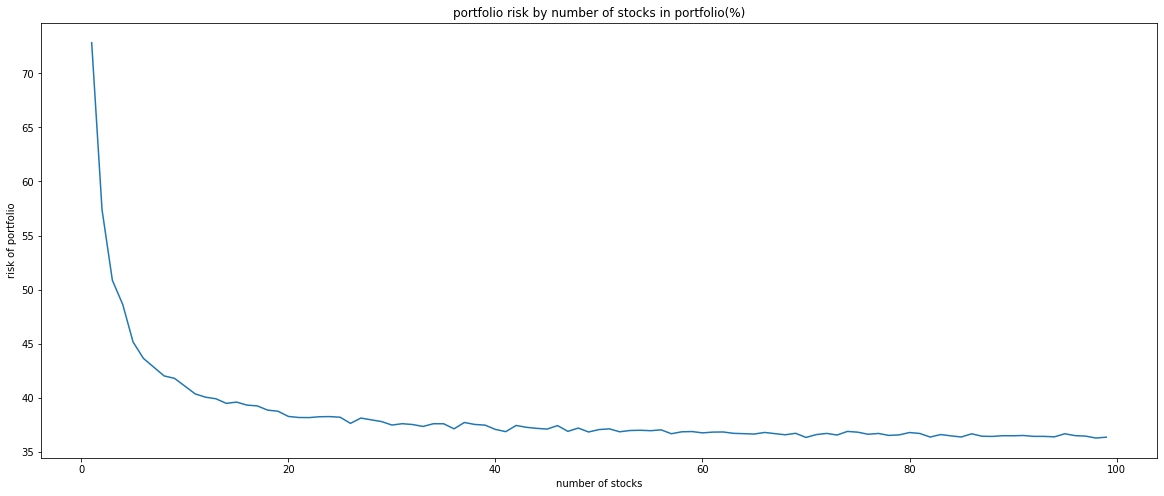

In [15]:
plt.figure(figsize=(20, 8))
plt.plot(range(1, 100), risk)
plt.xlabel('number of stocks')
plt.ylabel('risk of portfolio(%)')
plt.title('portfolio risk by number of stocks in portfolio(%)')
plt.plot()